### Задание 1
#### Автомобиль массой  1600  кг движется прямолинейно со скоростью  30  м/с. На полном ходу двигатель автомобиля останавливается. Сопротивление воздуха пропорционально квадрату скорости движения автомобиля и равно  8  кг при скорости 1 м/с ( k=8 ). Другими внешними силами пренебречь. Используя второй закон Ньютона составьте дифференциальное уравнение второго порядка и определите:

#### 1. Скорость автомобиля через  30  секунд. 
#### 2. Время, которое пройдет прежде чем скорость автомобиля станет  3  м/сек. 
#### 3. Расстояние, которое пройдет автомобиль прежде чем его скорость станет  3  м/сек.

In [5]:
from sympy import *
import math

t, m, k= symbols("t m k")
v = Function("v")
x = Function("x")

de1 = Eq(m*diff(v(t), t), -k*(v(t)))
de1

Eq(m*Derivative(v(t), t), -k*v(t))

In [6]:
Vt_ = dsolve(de1, v(t), ics={v(0): 30000/3600})
Vt_

Eq(v(t), 8.33333333333333*exp(-k*t/m))

In [7]:
Vt_.subs({t:30, k:8, m:1600})

Eq(v(30), 8.33333333333333*exp(-3/20))

In [9]:
print(f'v(30) = {8.3333333/math.exp(3/20)} м/c')

v(30) = 7.1725664415185495 м/c


In [17]:
t_3 = solve(Eq(Vt_.rhs, 3).subs({k:8, m:1600}), t)[0]
print(f't(v=3м/c) = {t_3} с')

t(v=3м/c) = 204.330249506396 с


In [18]:
de2 = Eq(diff(x(t), t), Vt_.rhs)
de2

Eq(Derivative(x(t), t), 8.33333333333333*exp(-k*t/m))

In [20]:
Xt = dsolve(de2, x(t), ics={x(0): 0}).subs({k:8, m:1600})
Xt

Eq(x(t), 1666.66666666667 - 1666.66666666667*exp(-t/200))

In [22]:
Xt.subs({t:t_3})

Eq(x(204.330249506396), 1066.66666666667)

### Задание 2. Нелинейный математический маятник
#### Рассматривается модель нелинейного математического маятника. Сформулируйте модель колебательной системы при которой маятник находящийся первые  ∼10  секунд выполняет полное вращение (один оборот) под действием внешней силы  F(t) . Затем колебания маятника затухают. Требуется, чтобы в конце наблюдений амплитуда колебаний не превышала  0.1  рад относительно значения  2π  на протяжении 5 секунд. При этом требуется чтобы при амплитуде колебания маятника  ≈π  угловая скорость была меньше  10−3  рад/с. Сила  F(t)  должна быть задана непрерывной функцией и зависеть от времени  t  и не зависеть от текущего состояния маятника.

#### Для составленного дифференциального уравнения постройте графики демонстрирующие изменение угла и угловой скорости с течением времени в соответствии с примером.

In [23]:
from matplotlib import animation
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [127]:
def f(y,t):
    return y[1], -0.1*y[1]-np.sin(y[0])
def f_force(y,t):
    return y[1], -0.1*y[1]-np.sin(y[0]) + (t/40)

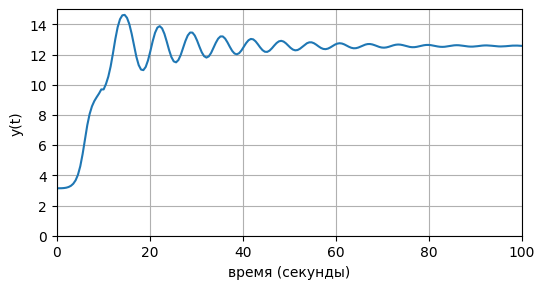

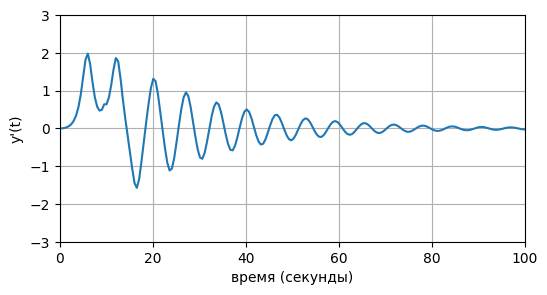

In [130]:
n, steps = 100, 200
xs = np.linspace(0,n,steps)

y0 = [np.pi, 0]  # начальный угол отклонения, начальная угловая скорость

us_force = odeint(f_force,y0,xs[:20])
ys_force = us_force[:,0]

us = odeint(f,us_force[-1],xs[20:])  # численное решение ДУ

plt.figure(figsize=(6,3), dpi = 100)
ys = us[:,0]          # найденные значения y(t) в точках, изменение угла с течением времени
plt.plot(xs,np.concatenate((us_force[:,0],ys), axis=0),'-')   # график для y(t)
plt.xlabel('время (секунды)')
plt.ylabel('y(t)')
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 15)
plt.show()

plt.figure(figsize=(6,3), dpi = 100)
ds = us[:,1]          # найденные значения y'(t) в точках, угловая скорость с течением времени
plt.plot(xs,np.concatenate((us_force[:,1],ds), axis=0),'-')   # график для y'(t)
plt.xlabel('время (секунды)')
plt.ylabel('y\'(t)')
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(-3, 3)
plt.show()